# Background Removal with Robust PCA

## Imports

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
warnings.filterwarnings("ignore")

In [ ]:
!sudo chmod -R 777 /Landmark2/pdo/aiking/archive

In [ ]:
# 
url = "http://backgroundmodelschallenge.eu/data/real/Video_003.zip"
path = untar_data(url); path

Path('/Landmark2/pdo/aiking/data/Video_003')

In [ ]:
img_list = (path/"img").ls()

def fswitch(t): return t[1]+ t[0]

img_list.map(lambda e : {'name':e, 'group':fswitch(e.stem.split("_"))})

(#30) [{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00452.bmp'), 'group': '00452Img'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00351.bmp'), 'group': '00351Img'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00452.bmp'), 'group': '00452Mask'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00351.bmp'), 'group': '00351Mask'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00552.bmp'), 'group': '00552Img'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00251.bmp'), 'group': '00251Img'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00552.bmp'), 'group': '00552Mask'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00251.bmp'), 'group': '00251Mask'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00350.bmp'), 'group': '00350Mask'},{'name': Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00652.bmp'), 'group': '00652Img'}...]

In [ ]:
(path/"img").ls()

(#30) [Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00452.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00351.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00452.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00351.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00552.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00251.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00552.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00251.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00350.bmp'),Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00652.bmp')...]

In [ ]:
(path/"img").ls().sorted

<bound method L.sorted of [Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00452.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00351.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00452.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00351.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00552.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00251.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00552.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00251.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00350.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00652.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00652.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00350.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00250.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Img_00250.bmp'), Path('/Landmark2/pdo/aiking/data/Video_003/img/Mask_00550.bmp'), Path(

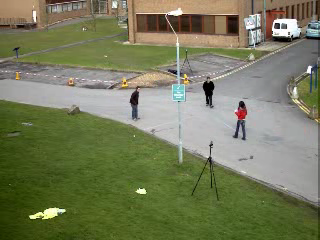

In [ ]:
PILImage.open((path/"img").ls()[0])

interactive(children=(IntSlider(value=0, description='i', max=29), Output()), _dom_classes=('widget-interact',…

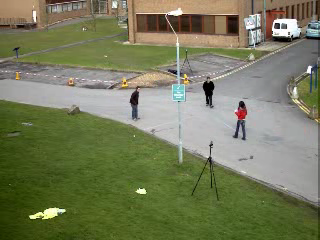

In [ ]:
@interact(i=(0,29))
def display_img(i=0):
    return PILImage.open((path/"img").ls()[i])

display_img()

## Video Clip

In [ ]:
video =mpe.VideoFileClip(str((path/"Video_003.avi").resolve())); video

In [ ]:
video.subclip(0,50).ipython_display(width=300)


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
video.duration
# video.get_frame(0).shape[0]*video.get_frame(0).shape[1]/16
video.get_frame(0).shape

(240, 320, 3)

## Preprocess Video to Matrix

In [ ]:
# clip = video
# k = 1
# duration = clip.duration
# # duration = 1
# scale = 50
def rgb2gray(rgb): return rgb@np.array([0.299, 0.587, 0.114])
def img2col(frame, dims): return resize(rgb2gray(frame), dims, anti_aliasing=True).astype(int).flatten()

def get_dims(frame, scale):
    w,h,c = frame.shape
    dims = (int(w*scale/100), int(h*scale/100))
    return dims
    
def vid2mat(clip, k=5, scale=50): 
    dims = get_dims(clip.get_frame(0), scale)
    return np.vstack(img2col(clip.get_frame(i/float(k)), dims) 
                     for i in range(k*int(clip.duration))).T

In [ ]:

video.get_frame?
k=
for i in range(int(video.duration)*k):
    print(i/float(k))

0.0
0.2
0.4
0.6
0.8
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
2.6
2.8
3.0
3.2
3.4
3.6
3.8
4.0
4.2
4.4
4.6
4.8
5.0
5.2
5.4
5.6
5.8
6.0
6.2
6.4
6.6
6.8
7.0
7.2
7.4
7.6
7.8
8.0
8.2
8.4
8.6
8.8
9.0
9.2
9.4
9.6
9.8
10.0
10.2
10.4
10.6
10.8
11.0
11.2
11.4
11.6
11.8
12.0
12.2
12.4
12.6
12.8
13.0
13.2
13.4
13.6
13.8
14.0
14.2
14.4
14.6
14.8
15.0
15.2
15.4
15.6
15.8
16.0
16.2
16.4
16.6
16.8
17.0
17.2
17.4
17.6
17.8
18.0
18.2
18.4
18.6
18.8
19.0
19.2
19.4
19.6
19.8
20.0
20.2
20.4
20.6
20.8
21.0
21.2
21.4
21.6
21.8
22.0
22.2
22.4
22.6
22.8
23.0
23.2
23.4
23.6
23.8
24.0
24.2
24.4
24.6
24.8
25.0
25.2
25.4
25.6
25.8
26.0
26.2
26.4
26.6
26.8
27.0
27.2
27.4
27.6
27.8
28.0
28.2
28.4
28.6
28.8
29.0
29.2
29.4
29.6
29.8
30.0
30.2
30.4
30.6
30.8
31.0
31.2
31.4
31.6
31.8
32.0
32.2
32.4
32.6
32.8
33.0
33.2
33.4
33.6
33.8
34.0
34.2
34.4
34.6
34.8
35.0
35.2
35.4
35.6
35.8
36.0
36.2
36.4
36.6
36.8
37.0
37.2
37.4
37.6
37.8
38.0
38.2
38.4
38.6
38.8
39.0
39.2
39.4
39.6
39.8
40.0
40.2
40.4
40.6
40.8
41.0
41.2
41.4
41.6
41.8


Signature: video.get_frame(t)
Docstring:
Gets a numpy array representing the RGB picture of the clip at time t
or (mono or stereo) value for a sound clip
File:      /opt/anaconda/envs/aiking/lib/python3.9/site-packages/moviepy/Clip.py
Type:      method


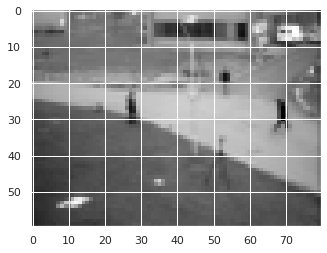

In [ ]:
dims = get_dims(video.get_frame(0), scale=25); dims
# plt.imshow(img2col(video.get_frame(0), dims).reshape(dims), cmap='gray')
# img2col(video.get_frame(0), dims).reshape(dims).min()

# plt.imshow(rgb2gray(video.get_frame(0)).astype(int), cmap='gray')

img2col(video.get_frame(0), dims)

plt.imshow(img2col(video.get_frame(0), dims).reshape(dims), cmap='gray')

In [ ]:
M = vid2mat(video, k=100, scale=25); M.shape

(4800, 11300)

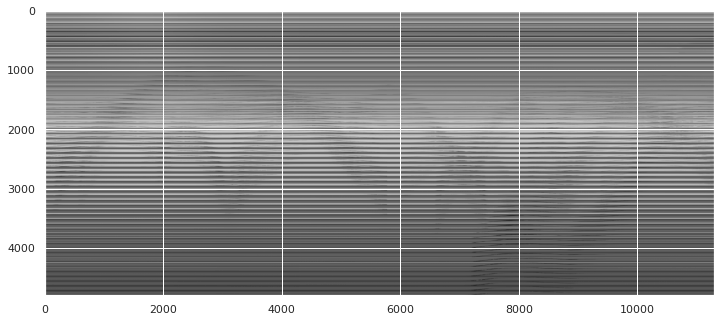

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(M, cmap='gray')

In [ ]:
@interact(i=IntSlider(min=0,max=11300-1, continuous_update=False))
def disp_img(i=0):
    plt.imshow(M[:,i].reshape(dims), cmap='gray')

interactive(children=(IntSlider(value=0, continuous_update=False, description='i', max=11299), Output()), _dom…

In [ ]:
np.save(path/"low_res_surveillance_matrix.npy", M)

## SVD

In [ ]:
u, s, v = decomposition.randomized_svd(M,1)

In [ ]:
u.shape, s.shape, v.shape

((4800, 1), (1,), (1, 11300))

In [ ]:
low_rank = u@np.diag(s)@v
low_rank.shape

(4800, 11300)

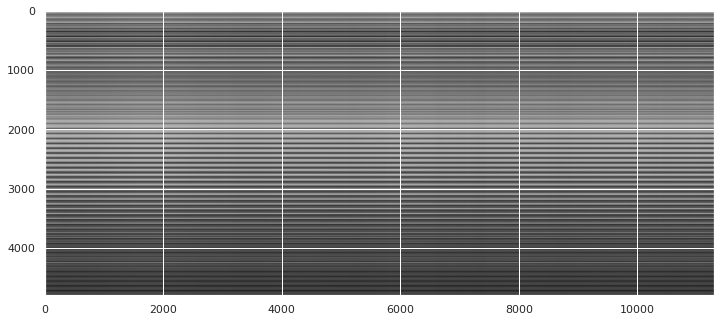

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(low_rank, cmap='gray')

In [ ]:
@interact(i=IntSlider(min=0,max=11300-1, continuous_update=False))
def disp_img(i=0):
    plt.figure()
    fig, axes= plt.subplots(2,2, figsize=(18,12))
    axes[0,0].imshow(video.get_frame(i/float(100)))
    axes[0,0].axis("off")
    axes[0,1].imshow(M[:,i].reshape(dims), cmap='gray')
    axes[0,1].axis("off")
    axes[1,1].imshow(low_rank[:,i].reshape(dims), cmap='gray')
    axes[1,1].axis("off")
    axes[1,0].imshow((M[:,i] - low_rank[:,i]).reshape(dims), cmap='gray')
    axes[1,0].axis("off")
    fig.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=0, continuous_update=False, description='i', max=11299), Output()), _dom…

<Figure size 432x288 with 0 Axes>

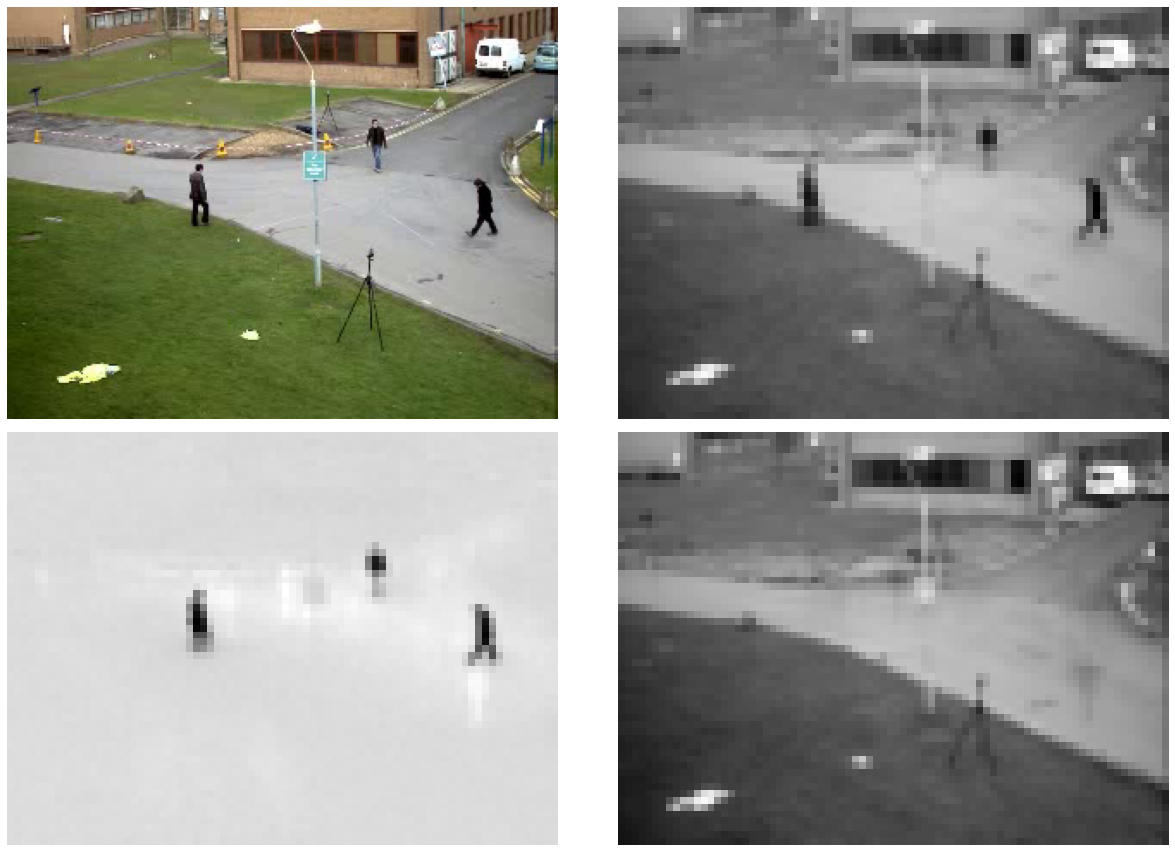

In [ ]:
disp_img(0)

# Principal Component Analysis (PCA)
- Leverage the fact -> data has **low intrinsic dimensionality**[Dealing with high dimensionality data].
- Alleviate the curse of dimensionality
- Problems with scale 
  - Perhaps data lies in low-dimensional subspace / low dimension manifold
- PCA eliminates dimensions
- Classical PCA ->
  - Best $rank_k$ estimate L of M ( min||M-L|| where L has $rank_k$)
  - Truncated SVD
  - Traditional PCA can handle small noise, but brittle w.r.t grossly corrupted observations--even one grossly corrupt observation can significantly mess up the answer

- Robust PCA -> M = L+S
  - L is low-rank
  - S is sparse
  - Low-rank means that the matrix has a lot of redundant info-background
  - Sparse -> S capturing corrupted entries 

- Applications
  - Video Surveillance
  - Face Recognition
  - Latent Semantic Indexing =:
    - L captures common words used in all documents
    - S captures a few keywords that best distinguish each document from others
  - Ranking and Collaborative Filtering =: Small portion of available rankings could be noisy & even tampered with

- The L1 norm induces sparsity :: $$||x||_1=1$$
  - Contours of the loss function
  - Corner of a rectangle

- Robust PCA Optimization Problem :: $min ||L||_* + \lambda||S||_1 \text{ subject to } L+S=M$
  $$||.||_1$$ is the L1 norm -> results i sparse values [ max. absolute column norm]
  - $$||.||_*$$ is the nuclear norm -> L1 norm of singular values -> sparse singular values -> low rank